In [178]:
!pip install plotly
!pip install cufflinks
!pip install chart_studio

In [179]:
#importing python libraries
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [180]:
#import the csv file.Column next_pymnt_d has mixed types, so Specified dtype option on import
loan=pd.read_csv(r"C:\Users\home\Downloads\loan\loan.csv",encoding = "ISO-8859-1",dtype={"next_pymnt_d":"string"})

In [181]:
#Printing characteristics of loan data
print(loan.shape)
print(loan.info())
loan.head()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(23), string(1)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [182]:
#finding the columns with all the null rows
loan.loc[:,loan.isnull().sum()==len(loan)]

# Deleting these columns with all the null values as they don't give any data information
loan1=loan.dropna(axis=1,how='all')

#Printing the characteristics of loan1 dataframe
print(loan1.shape)
print(loan1.info())
loan1.head()

(39717, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc         

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,<NA>,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,<NA>,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,<NA>,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,<NA>,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [183]:
#Finding percentage of null values in each column 
print(100*(loan1.isnull().sum()/len(loan1.index)))

# Finding Columns with null percentage greater than 90 and storing in loan90
loan90=loan1.loc[:,100*(loan1.isnull().sum()/len(loan1.index))>90]

#Dropping the columns with null percentage greater than 90
loan1.drop(loan90,axis=1,inplace=True)

#Printing Characteristics of loan1
print(loan1.shape)
print(loan1.info())


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [184]:
# Finding correlation between loan amount,funded amount and funded amount inv
loan1[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981578,0.940034
funded_amnt,0.981578,1.000000,0.958422
funded_amnt_inv,0.940034,0.958422,1.000000


In [185]:
# As the correlation between these 3 columns is very high, we can use either one of these for further analysis.
# Hence, Dropping Funded_amnt and funded_amnt_inv
loan1.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [186]:
# Dropping Columns which represent customer loan behaviour. This information is not useful to find the defaulted customers.
loan2=loan1.drop(['desc','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','revol_bal','revol_util',
                'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                'last_credit_pull_d','collections_12_mths_ex_med','open_acc','total_acc','chargeoff_within_12_mths','delinq_amnt','pub_rec',
                'acc_now_delinq','pub_rec_bankruptcies','tax_liens','url'],axis=1)

In [187]:
# Printing loan2 dataframe characteristics
print(loan2.shape)
loan2.info()

(39717, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  pymnt_plan           397

In [188]:
#Checking the unique values count of loan status column
loan2.loan_status.value_counts()

# Removing loan status = 'Current' Rows from data set as this doesn't imply either default or Non-Default Customers
loan2woc=loan2[loan2.loan_status!='Current']

In [189]:
# Manipulating(adding/Modifying) additional columns for further analysis

# Adding a column to show Default customer
loan2woc['Default_Cust']=loan2woc.loan_status.apply(lambda x:1 if x =='Charged Off' else 0)

# Modifying int_rate column to remove % at the end
loan2woc['int_rate']=loan2woc.int_rate.apply(lambda x:x.rstrip("%")).astype("float64")

# Cleaning the Emp_length for converting the text to numerical values
loan2woc['emp_length'] = loan2woc['emp_length'].map(lambda x: 
                    float(x.replace(' years','').replace(' year','').replace('+','').replace('< ','')) 
                    if type(x) == str else x)

# Adding a column to show the year of issued loan
loan2woc['issue_d_year']=loan2woc.issue_d.apply(lambda x:x[-2:])

In [190]:
# For columns emp_title , emp_length and title null value rows are removed 
loan2woc=loan2woc[~loan2woc.emp_title.isnull()]
loan2woc=loan2woc[~loan2woc.emp_length.isnull()]
loan2woc=loan2woc[~loan2woc.title.isnull()]

In [191]:
# Making bins for few numerical values
loan2woc['int_rate_bin']=pd.qcut(loan2woc.int_rate,[0,0.25,0.5,0.75,1],['VLow','Low','Medium','High'])
loan2woc['annual_inc_bin']=pd.qcut(loan2woc.annual_inc,[0,0.5,1],['Avg','High'])
loan2woc['dti_bin']=pd.qcut(loan2woc.dti,[0,0.25,0.5,0.75,1],['VLow','Low','Medium','High'])

# Creating Range for Loan Amount
loan2woc['loan_amnt_range']=pd.cut(loan2woc.loan_amnt,bins=5,labels=['<7.4k','7.4k-14.3k','14.3k-21.2k','21.2k-28.1k','>28.1k'])

In [192]:
loan2woc.info()
loan2woc.Default_Cust.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36127 entries, 1 to 39716
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   36127 non-null  int64   
 1   member_id            36127 non-null  int64   
 2   loan_amnt            36127 non-null  int64   
 3   term                 36127 non-null  object  
 4   int_rate             36127 non-null  float64 
 5   installment          36127 non-null  float64 
 6   grade                36127 non-null  object  
 7   sub_grade            36127 non-null  object  
 8   emp_title            36127 non-null  object  
 9   emp_length           36127 non-null  float64 
 10  home_ownership       36127 non-null  object  
 11  annual_inc           36127 non-null  float64 
 12  verification_status  36127 non-null  object  
 13  issue_d              36127 non-null  object  
 14  loan_status          36127 non-null  object  
 15  pymnt_plan         

0    30997
1     5130
Name: Default_Cust, dtype: int64

# Univariate Analysis and Bivariate Analysis

In [193]:
loan2woc.Default_Cust.value_counts()/len(loan2woc.index)

0    0.858001
1    0.141999
Name: Default_Cust, dtype: float64

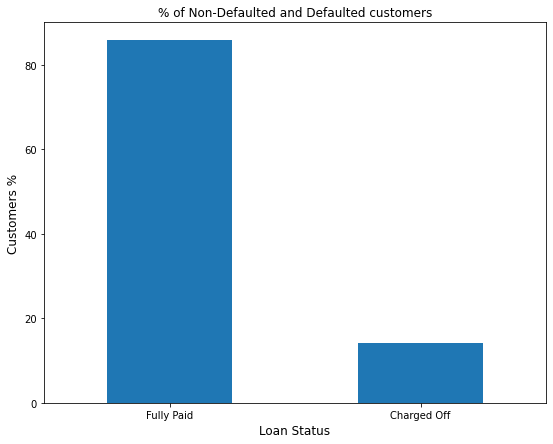

In [194]:
# Analysing percentage of Defaulted and Non-Defaulted customers
plt.figure(figsize=[9,7])
plt.title('% of Non-Defaulted and Defaulted customers')
plt.xlabel('Loan Status',size=12)
plt.ylabel('Customers %',size=12)
(loan2woc.loan_status.value_counts()/len(loan2woc.index)*100).plot(kind='bar',rot=0)
plt.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

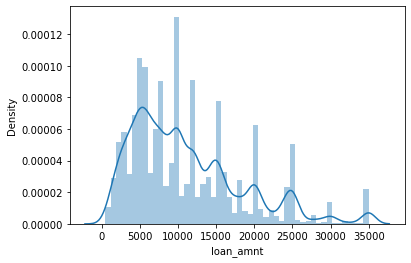

In [195]:
#Analysing loan Amount dstribution
sns.distplot(loan2woc.loan_amnt)

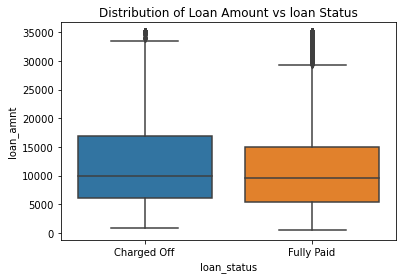

In [196]:
#Analyzing Distribution of Defaulted and Non Defaulted customers vs loan amount
sns.boxplot(x=loan2woc.loan_status,y=loan2woc.loan_amnt)
plt.title('Distribution of Loan Amount vs loan Status')
plt.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

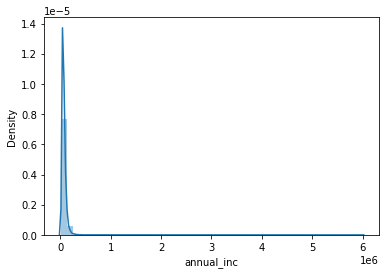

In [197]:
#Analyzing the spread of annual Income
sns.distplot(loan2woc.annual_inc)

In [198]:
#Creating a generic function to display relationship between Default Rate and other relevant columns 
def plot(x):
    plt.figure(figsize=[15,7])
    (loan2woc.groupby(x)['Default_Cust'].sum()/len(loan2woc.Default_Cust)*100).plot(kind='bar',rot=0)
    plt.title('Default Rate of Customers against ' + x)
    plt.ylabel('Default Rate of Customers',size=12)
    y=plt.show()
    return y

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='int_rate', ylabel='Density'>

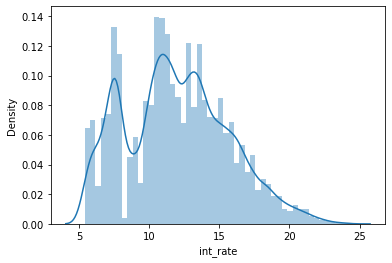

In [199]:
# Analysing the spread of int rate
sns.distplot(loan2woc.int_rate)

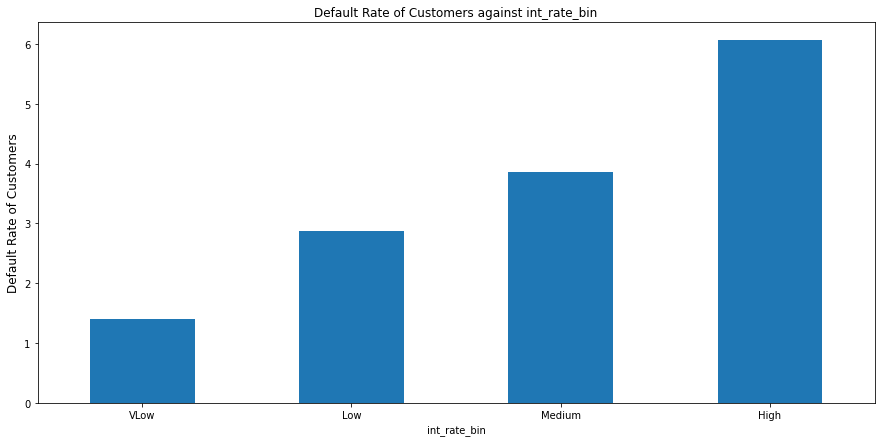

In [200]:
# Analyzing Default Rate of Customers against Int Rate
q=plot('int_rate_bin')

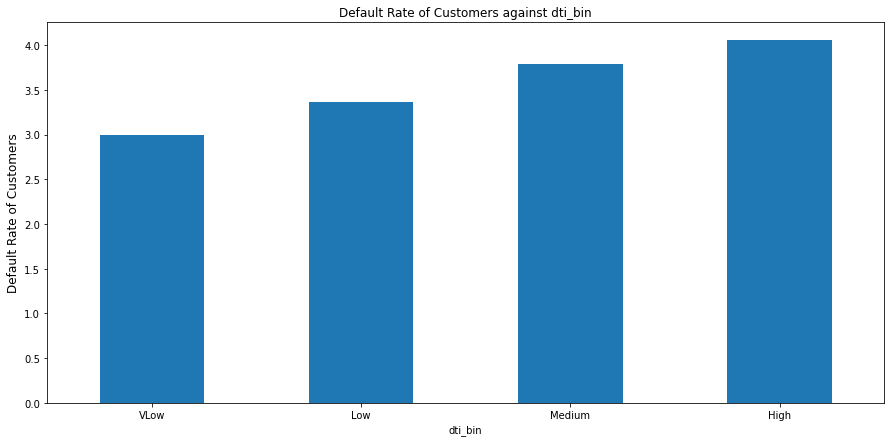

In [201]:
#Analysing Default Rate of Customers against dti 
plot('dti_bin')

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



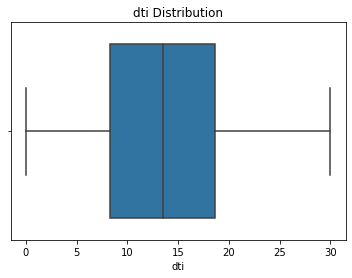

In [202]:
#Distribution of DTI
sns.boxplot(loan2woc.dti)
plt.title('dti Distribution')
plt.show()

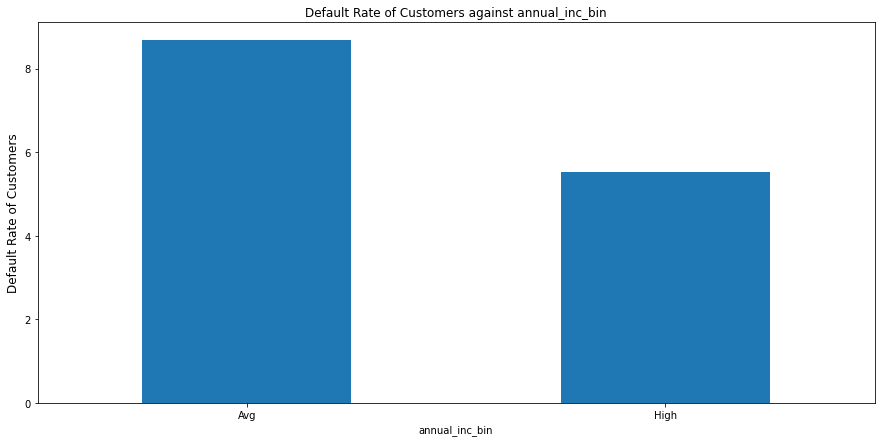

In [203]:
# Analyzing Default Rate of Customers against term
p=plot('annual_inc_bin')

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



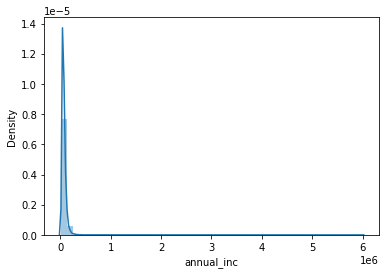

In [204]:
#Distribution of annual Income
sns.distplot(loan2woc.annual_inc)
plt.show()

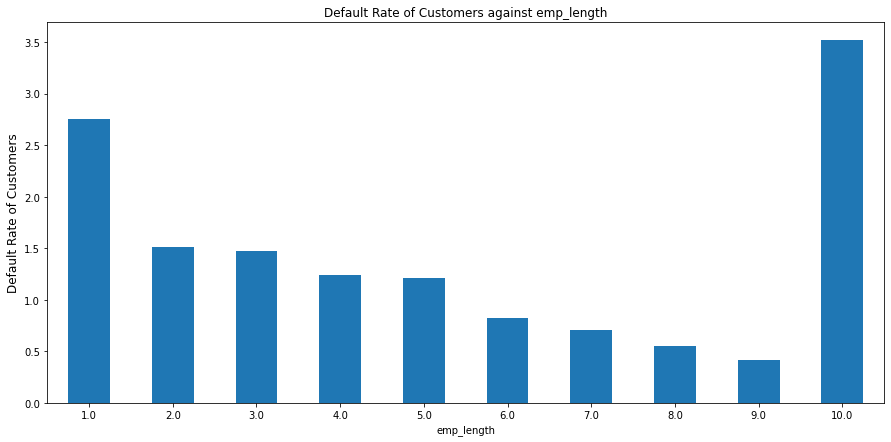

In [205]:
# Analyzing Default Rate of Customers against emp length
p=plot('emp_length')

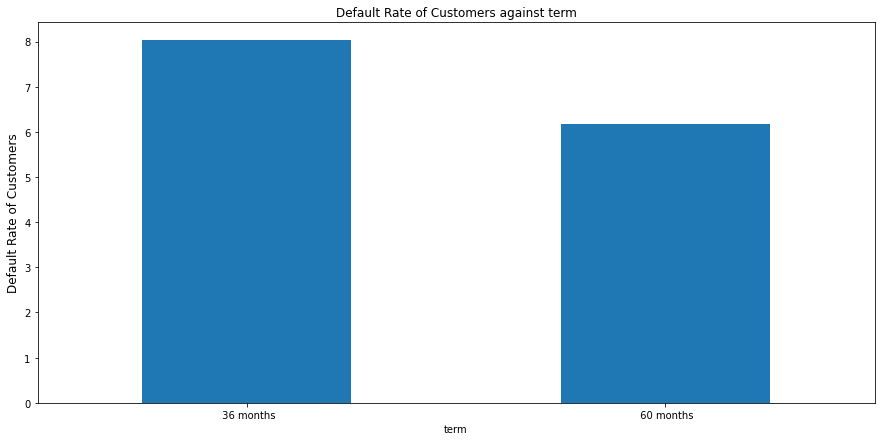

In [206]:
# Analyzing Default Rate of Customers against term
p=plot('term')

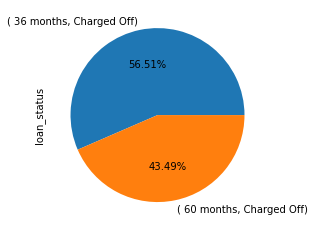

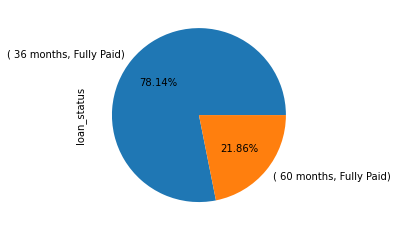

In [207]:
#Analysing the percentage of term across different loan status
loan2woc[loan2woc.loan_status=='Charged Off'].groupby('term')['loan_status'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()
loan2woc[loan2woc.loan_status=='Fully Paid'].groupby('term')['loan_status'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

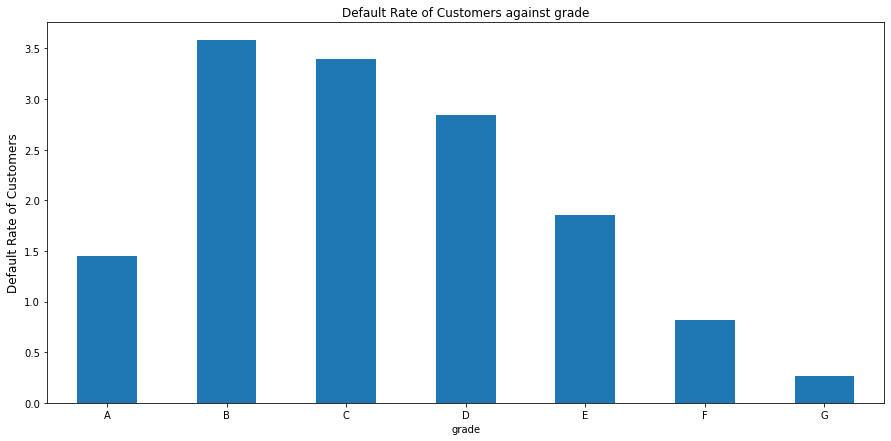

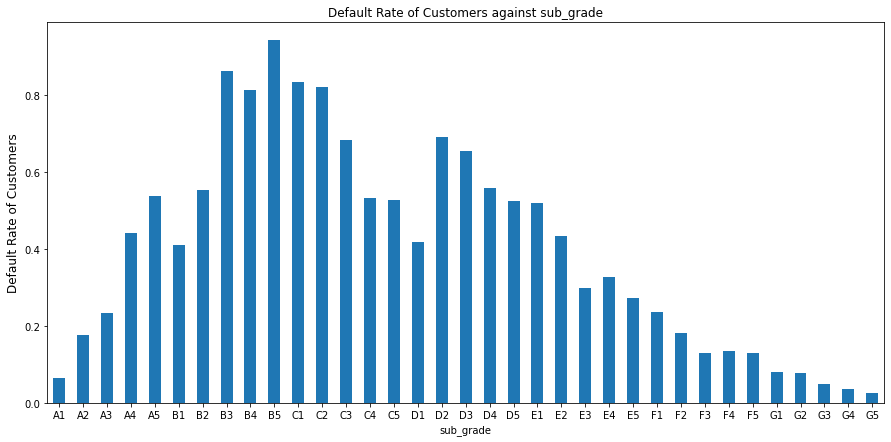

In [208]:
#Analysing Default Rate of Customers against Grade and Sub Grade
plot('grade')
plot('sub_grade')

<AxesSubplot:title={'center':'Percentage of grade across Charged Off'}, ylabel='grade'>

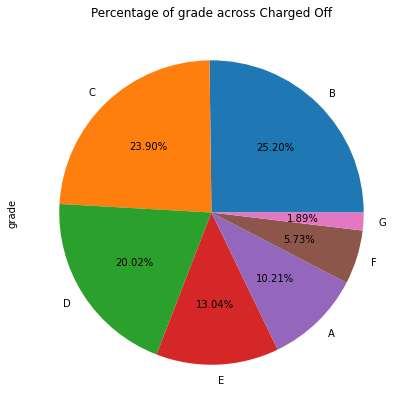

In [209]:
# Analyzing % Distribution of grades for Charged off 
plt.figure(figsize=[15,7])
plt.title('Percentage of grade across Charged Off')
loan2woc[loan2woc.loan_status=='Charged Off']['grade'].value_counts().plot.pie(autopct='%1.2f%%')


<AxesSubplot:title={'center':'Percentage of grade across Fully Paid'}, ylabel='grade'>

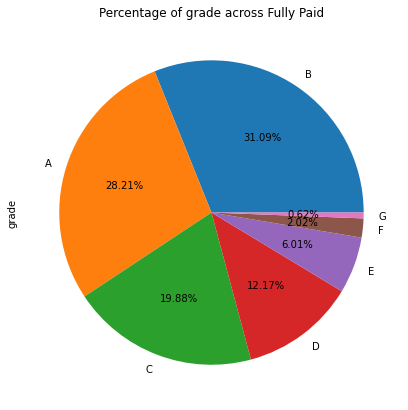

In [210]:
# Analyzing % Distribution of grades for Fully Paid
plt.figure(figsize=[15,7])
plt.title('Percentage of grade across Fully Paid')
loan2woc[loan2woc.loan_status=='Fully Paid']['grade'].value_counts().plot.pie(autopct='%1.2f%%')

In [211]:
loan2woc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36127 entries, 1 to 39716
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   36127 non-null  int64   
 1   member_id            36127 non-null  int64   
 2   loan_amnt            36127 non-null  int64   
 3   term                 36127 non-null  object  
 4   int_rate             36127 non-null  float64 
 5   installment          36127 non-null  float64 
 6   grade                36127 non-null  object  
 7   sub_grade            36127 non-null  object  
 8   emp_title            36127 non-null  object  
 9   emp_length           36127 non-null  float64 
 10  home_ownership       36127 non-null  object  
 11  annual_inc           36127 non-null  float64 
 12  verification_status  36127 non-null  object  
 13  issue_d              36127 non-null  object  
 14  loan_status          36127 non-null  object  
 15  pymnt_plan         

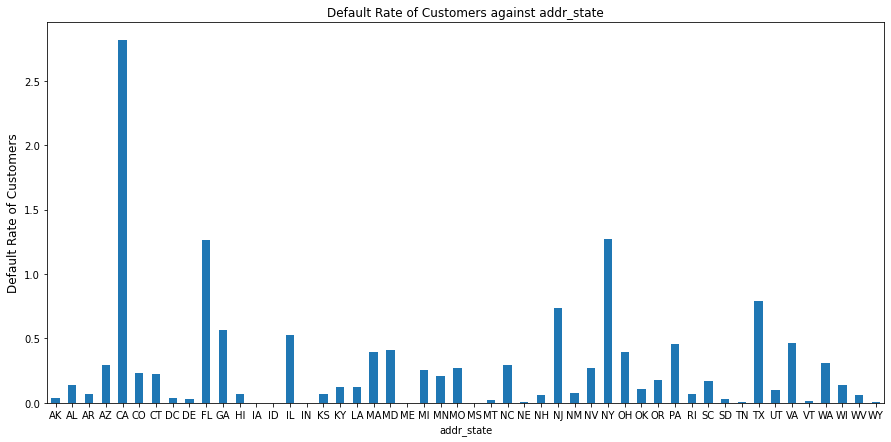

In [212]:
#Analysing Default Rate wrt Customers Address State
plot('addr_state')

In [213]:
# Count of Charged off Customers for Different Verification Status
fig = px.bar(loan2woc[(loan2woc['loan_status'] == 'Charged Off')].groupby(['verification_status'])['id'].count().reset_index(),
             x='verification_status',y='id',
             text='id',
            labels={'id':'Total Count of Customers','verification_status':'Verification Status'},
             color='verification_status'
            )

fig.update_layout(plot_bgcolor='white',xaxis=dict(
    showline=True,showgrid=True,showticklabels=True,
    linecolor='rgb(204,204,204)',
    linewidth=1,ticks='outside',tickfont=dict(family='Arial',size=12,color='rgb(82,82,82)')
    ),
    yaxis=dict(
        showgrid=True,zeroline=True,showline=True,
        showticklabels=True,
        linecolor='rgb(204,204,204)',
    ),
    title='Verification status Count for the Charged off Accounts',
    showlegend=True,
    legend=dict(title='Verification Status')
   )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.show()

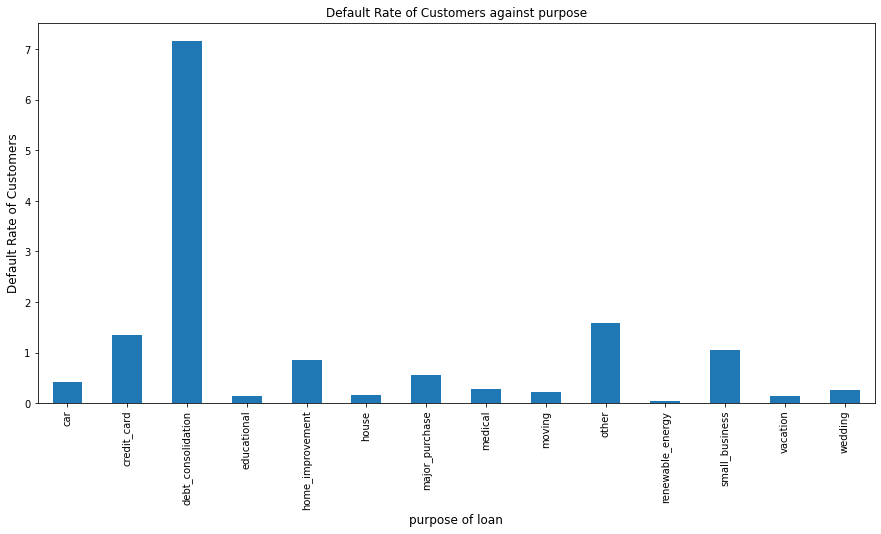

In [214]:
#Analysing Default Rate of Customers against purpose
plt.figure(figsize=[15,7])
(loan2woc.groupby('purpose')['Default_Cust'].sum()/len(loan2woc.Default_Cust)*100).plot(kind='bar')
plt.title('Default Rate of Customers against purpose')
plt.ylabel('Default Rate of Customers',size=12)
plt.xlabel('purpose of loan',size=12)
plt.show()

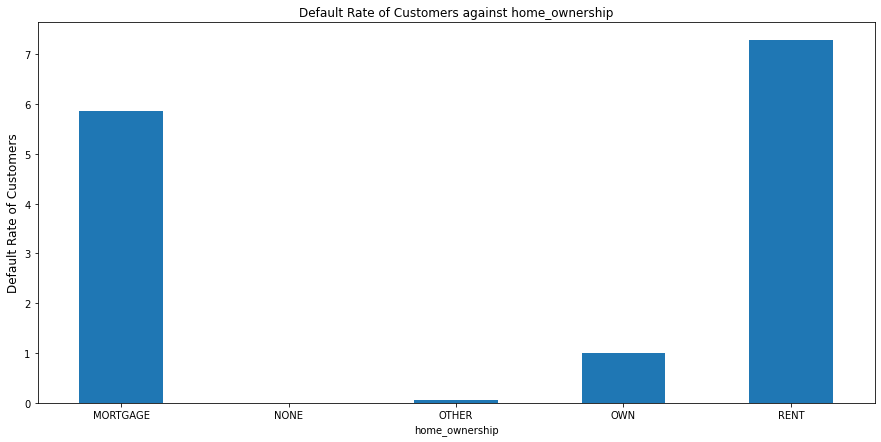

In [215]:
#Analysing Default Rate of Customers against home ownership 
plot('home_ownership')

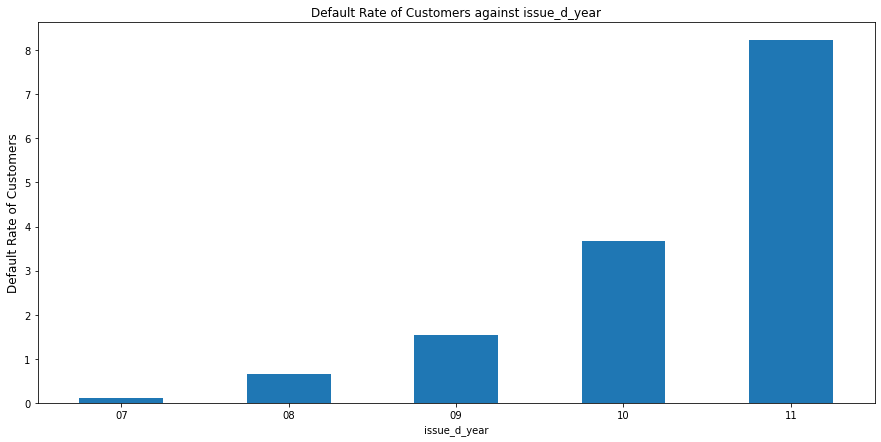

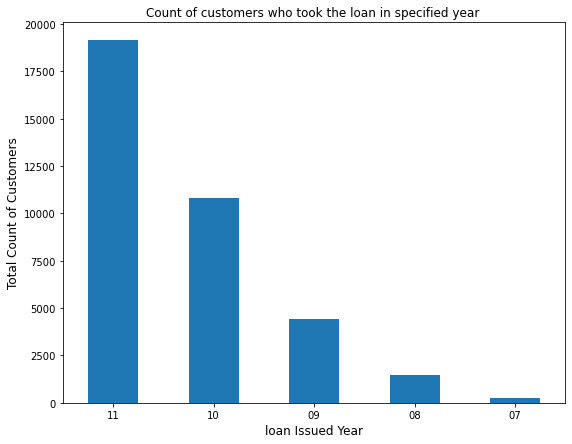

In [216]:
#Analysing Default Rate of Customers against loan issued year 
plot('issue_d_year')
plt.figure(figsize=[9,7])
plt.title('Count of customers who took the loan in specified year ')
plt.xlabel('loan Issued Year',size=12)
plt.ylabel('Total Count of Customers',size=12)
loan2woc.issue_d_year.value_counts().plot(kind='bar',rot=0)
plt.show()

<Figure size 1296x2160 with 0 Axes>

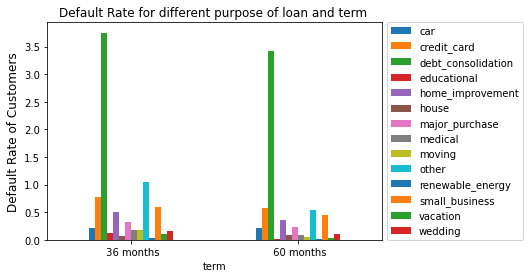

In [217]:
#Analyzing Default Rate on basis of term and purpose of loan
plt.figure(figsize=[18,30])
(loan2woc.groupby(['term','purpose'])['Default_Cust'].sum()/len(loan2woc.Default_Cust)*100).unstack().plot(kind='bar',rot=0)
plt.title('Default Rate for different purpose of loan and term ')
plt.ylabel('Default Rate of Customers',size=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 1296x2160 with 0 Axes>

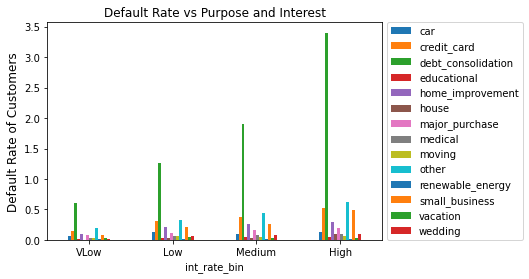

In [218]:
#Analyzing Default Rate for Different Purpose and Interest
plt.figure(figsize=[18,30])
(loan2woc.groupby(['int_rate_bin','purpose'])['Default_Cust'].sum()/len(loan2woc.Default_Cust)*100).unstack().plot(kind='bar',rot=0)
plt.title('Default Rate vs Purpose and Interest')
plt.ylabel('Default Rate of Customers',size=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 1296x2880 with 0 Axes>

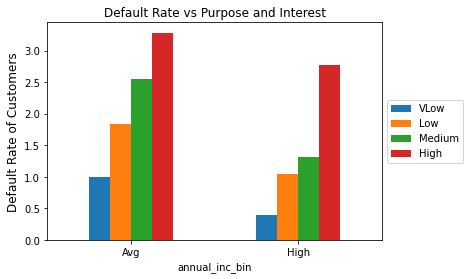

In [219]:
#Analyzing Default Rate for Different Annual Income and Interest Rate
plt.figure(figsize=[18,40])
(loan2woc.groupby(['annual_inc_bin','int_rate_bin'])['Default_Cust'].sum()/len(loan2woc.Default_Cust)*100).unstack().plot(kind='bar',rot=0)
plt.title('Default Rate vs Purpose and Interest')
plt.ylabel('Default Rate of Customers',size=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

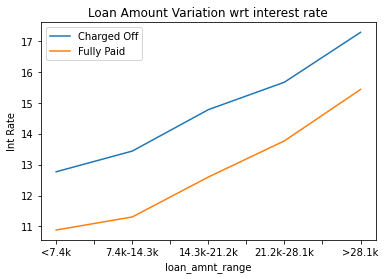

In [220]:
# Variation of Loan Amount wrt Interest Rate
loan2woc[loan2woc.loan_status=='Charged Off'].groupby(['loan_amnt_range'])['int_rate'].mean().plot.line(label='Charged Off')
loan2woc[loan2woc.loan_status=='Fully Paid'].groupby(['loan_amnt_range'])['int_rate'].mean().plot.line(label='Fully Paid')
plt.title('Loan Amount Variation wrt interest rate')
plt.ylabel('Int Rate')
plt.legend()
plt.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Annual Income vs Loan Amount for Charged Off')

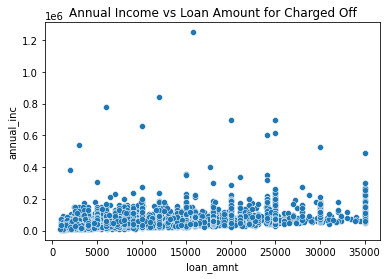

In [221]:
#Variation of Annual Income vs Loan Amount for Charged Off
sns.scatterplot(loan2woc[loan2woc.loan_status=='Charged Off']['loan_amnt'],loan2woc[loan2woc.loan_status=='Charged Off']['annual_inc'])
plt.title('Annual Income vs Loan Amount for Charged Off')

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Annual Income vs Loan Amount for Fully Paid')

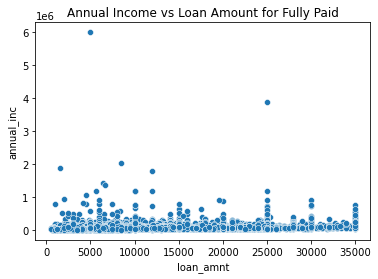

In [222]:
#Variation of Annual Income vs Loan Amount for Fully Paid
sns.scatterplot(loan2woc[loan2woc.loan_status=='Fully Paid']['loan_amnt'],loan2woc[loan2woc.loan_status=='Fully Paid']['annual_inc'])
plt.title('Annual Income vs Loan Amount for Fully Paid')

In [223]:
# Creating Range for Annual Income Amount
loan2woc['annual_inc_amnt_range']=pd.cut(loan2woc.annual_inc,bins=6,labels=['<1M','1M-2M','2M-3M','3M-4M','4M-5M','5M-6M'])

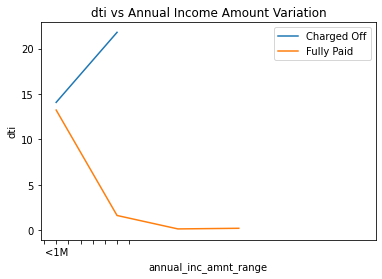

In [224]:
# Variation of dti wrt annual income amount
loan2woc[loan2woc.loan_status=='Charged Off'].groupby(['annual_inc_amnt_range'])['dti'].mean().plot.line(label='Charged Off')
loan2woc[loan2woc.loan_status=='Fully Paid'].groupby(['annual_inc_amnt_range'])['dti'].mean().plot.line(label='Fully Paid')
plt.title('dti vs Annual Income Amount Variation')
plt.ylabel('dti')
plt.legend()
plt.show()